In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI/Customer/digital_marketing_campaign_dataset.csv")
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

## Kiểm tra dữ liệu thiếu và xử lý

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0


In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns

In [ ]:
df = df.drop(['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 16  Conversion         8000 

# chuẩn hoá dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler

# Các cột cần chuẩn hóa
numerical_features = [
    'Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
    'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'
]

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuẩn hóa các cột số
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Kiểm tra dữ liệu sau chuẩn hóa
print(df.head())

        Age  Gender    Income CampaignChannel CampaignType   AdSpend  \
0  0.830400  Female  1.390381    Social Media    Awareness  0.527484   
1  1.702775    Male -1.141736           Email    Retention -0.388418   
2  0.159343  Female  0.100905             PPC    Awareness -1.217296   
3 -0.780138  Female -1.079865             PPC   Conversion -1.572106   
4  1.098823  Female -0.018633             PPC   Conversion -1.170918   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0         -1.320328       -0.298084      -1.729507      -1.208303   -0.078268   
1          0.010671        1.427538       1.205221      -1.009576   -0.561778   
2          1.460225       -0.509632      -1.589758       1.025746    1.435016   
3         -0.204964       -0.298580       1.554594      -0.386761    1.646339   
4          1.166907        0.101164      -1.729507      -1.343379    1.481958   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0 

## Chuyển đổi dữ liệu

In [ ]:
from sklearn.preprocessing import LabelEncoder
ob_features = df.select_dtypes(include = 'object').columns

# Khởi tạo bộ mã hóa nhãn
le = LabelEncoder()

# Áp dụng bộ mã hóa nhãn cho các cột thuộc loại dữ liệu categorical
df[ob_features] = df[ob_features].apply(lambda col: le.fit_transform(col))

In [ ]:
df.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,0.830400,0,1.390381,4,0,0.527484,-1.320328,-0.298084,-1.729507,-1.208303,-0.078268,-1.065759,-0.608829,1.586840,-0.168115,-1.260823,1
1,1.702775,1,-1.141736,0,3,-0.388418,0.010671,1.427538,1.205221,-1.009576,-0.561778,-1.550199,-1.309262,0.886654,-0.860656,0.677701,1
2,0.159343,0,0.100905,1,0,-1.217296,1.460225,-0.509632,-1.589758,1.025746,1.435016,-1.723213,0.266712,-0.863810,1.216969,-0.107223,1
3,-0.780138,0,-1.079865,1,2,-1.572106,-0.204964,-0.298580,1.554594,-0.386761,1.646339,1.356440,-1.309262,-0.863810,-1.553198,-0.019076,1
4,1.098823,0,-0.018633,1,2,-1.170918,1.166907,0.101164,-1.729507,-1.343379,1.481958,-1.515596,-0.608829,0.536561,1.216969,1.297525,1


# xử lý mất cân bằng dữ liệu

Số lượng mẫu trong mỗi nhãn:
Conversion
1    7012
0     988
Name: count, dtype: int64

Tỷ lệ phần trăm của từng nhãn:
Conversion
1    87.65
0    12.35
Name: count, dtype: float64


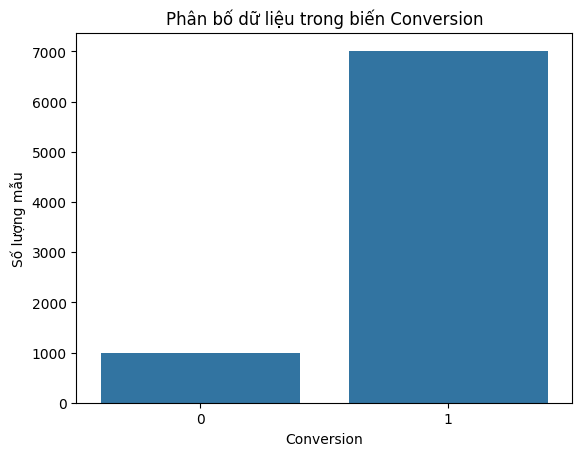

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số lượng nhãn
label_counts = df['Conversion'].value_counts()

# Hiển thị số lượng và tỷ lệ của từng nhãn
print("Số lượng mẫu trong mỗi nhãn:")
print(label_counts)
print("\nTỷ lệ phần trăm của từng nhãn:")
print(label_counts / len(df) * 100)

# Biểu đồ trực quan hóa
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel("Conversion")
plt.ylabel("Số lượng mẫu")
plt.title("Phân bố dữ liệu trong biến Conversion")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Tách X và y
X = df.drop('Conversion', axis=1)
y = df['Conversion']

# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Kiểm tra lại phân bố nhãn
print("Phân bố sau khi dùng SMOTE:")
print(y_resampled.value_counts())

Phân bố sau khi dùng SMOTE:
Conversion
1    7012
0    7012
Name: count, dtype: int64


In [ ]:
X_resampled.shape

(14024, 16)

## Chia dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Mô hình KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Khởi tạo mô hình KNN
# knn_model = KNeighborsClassifier(n_neighbors= 113, weights = 'uniform', metric = 'manhattan')
knn_model = KNeighborsClassifier()


# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)
# Đánh giá hiệu suất của mô hình
print('MÔ HÌNH K-Nearest Neighbors":')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy *100:.2f}' ' %')

# In ra confusion matrix và báo cáo classification
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

MÔ HÌNH K-Nearest Neighbors":
Accuracy: 83.42 %

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1377
           1       0.99      0.68      0.81      1428

    accuracy                           0.83      2805
   macro avg       0.87      0.84      0.83      2805
weighted avg       0.87      0.83      0.83      2805


Confusion Matrix:
[[1372    5]
 [ 460  968]]


## Mô hình hồi quy logitic

In [ ]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
# logreg_model = LogisticRegression(max_iter = 1000)
logreg_model = LogisticRegression()


# Huấn luyện mô hình trên tập huấn luyện
logreg_model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = logreg_model.predict(X_test)
# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100 :.2f}'' %')

# In ra confusion matrix và báo cáo classification
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 73.94 %

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1377
           1       0.75      0.73      0.74      1428

    accuracy                           0.74      2805
   macro avg       0.74      0.74      0.74      2805
weighted avg       0.74      0.74      0.74      2805


Confusion Matrix:
[[1034  343]
 [ 388 1040]]


In [ ]:
# Lấy ra các hệ số (weights) và intercept từ mô hình
weights = logreg_model.coef_
intercept =logreg_model.intercept_

# In ra hàm dự đoán
print("Hàm dự đoán:")
print(f"y_pred = sigmoid({intercept} + {weights} * X)")

Hàm dự đoán:
y_pred = sigmoid([-0.21832414] + [[0.00608597 0.78615514 0.0487488  0.08937905 0.26758002 0.41778845
  0.44886671 0.31145851 0.29335677 0.33549817 0.50314682 0.00721434
  0.42150846 0.45071328 0.38317303 0.39851771]] * X)


## Mô hình Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier()

# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy *100:.2f}' ' %')

# In ra báo cáo phân loại và ma trận nhầm lẫn
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 94.69 %

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1377
           1       0.96      0.94      0.95      1428

    accuracy                           0.95      2805
   macro avg       0.95      0.95      0.95      2805
weighted avg       0.95      0.95      0.95      2805


Confusion Matrix:
[[1314   63]
 [  86 1342]]


## Mô hình XGBoost

In [ ]:
from xgboost import XGBClassifier
# Xây dựng mô hình XGBoost
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = xgboost_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
print('MÔ HÌNH XGBoost":')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}')

# In ra confusion matrix và báo cáo classification
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

MÔ HÌNH XGBoost":
Accuracy: 95.61

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1377
           1       0.95      0.97      0.96      1428

    accuracy                           0.96      2805
   macro avg       0.96      0.96      0.96      2805
weighted avg       0.96      0.96      0.96      2805


Confusion Matrix:
[[1297   80]
 [  43 1385]]


# cải tiến mô hình với GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 1. KNN
knn_params = {
    'n_neighbors': [3, 5, 7,15,50,100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# 2. Logistic Regression
lr_params = {
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# 3. Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# 4. XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 10,20],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best KNN Params:", knn_grid.best_params_)
print("Best Logistic Regression Params:", lr_grid.best_params_)
print("Best Random Forest Params:", rf_grid.best_params_)
print("Best XGBoost Params:", xgb_grid.best_params_)

# Dự đoán và đánh giá
knn_best = knn_grid.best_estimator_
lr_best = lr_grid.best_estimator_
rf_best = rf_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_

models = {
    'KNN': knn_best,
    'Logistic Regression': lr_best,
    'Random Forest': rf_best,
    'XGBoost': xgb_best
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:45:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:45:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:45:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:45:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:45:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Logistic Regression Params: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'subsample': 0.8}
KNN Accuracy: 0.85
Logistic Regression Accuracy: 0.74
Random Forest Accuracy: 0.95
XGBoost Accuracy: 0.97


In [ ]:
import joblib
# lưu mô hình
models = {
    'KNN': knn_best,
    'Logistic Regression': lr_best,
    'Random Forest': rf_best,
    'XGBoost': xgb_best
}
path = "/content/drive/MyDrive/AI/Customer/model2"

# Lưu từng mô hình
for name, model in models.items():
    joblib.dump(model, f"{path}/{name}_model.joblib")
    print(f"{name} model đã được lưu tại: {path}/{name}_model.joblib")

KNN model đã được lưu tại: /content/drive/MyDrive/AI/Customer/model2/KNN_model.joblib
Logistic Regression model đã được lưu tại: /content/drive/MyDrive/AI/Customer/model2/Logistic Regression_model.joblib
Random Forest model đã được lưu tại: /content/drive/MyDrive/AI/Customer/model2/Random Forest_model.joblib
XGBoost model đã được lưu tại: /content/drive/MyDrive/AI/Customer/model2/XGBoost_model.joblib


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, classification_report
from sklearn.preprocessing import label_binarize

# Hàm vẽ Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Hàm vẽ ROC Curve
def plot_roc_curve(y_true, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Vẽ và tính toán các chỉ số cho từng mô hình
for name, model in models.items():
    # Dự đoán xác suất và nhãn
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # Confusion Matrix
    print(f"\n{name} - Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred, name)

    # F1 Score và báo cáo phân loại
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - F1 Score: {f1:.2f}")
    print(f"{name} - Classification Report:\n", classification_report(y_test, y_pred))

    # ROC Curve
    print(f"\n{name} - ROC Curve:")
    plot_roc_curve(y_test, y_prob, name)


NameError: name 'models' is not defined

## đặc trưng quan trọng cho mô hình

In [ ]:
feature_names = X_train.columns
feature_names

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints'],
      dtype='object')

### random forest

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
rf_model=joblib.load('/content/drive/MyDrive/AI/Customer/model2/Random Forest_model.joblib')

In [ ]:
# Trích xuất độ quan trọng của đặc trưng
importances_rf = rf_model.feature_importances_

In [ ]:
# Hiển thị đặc trưng quan trọng dưới dạng bảng
rf_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

              Feature  Importance
13        EmailClicks    0.112652
14  PreviousPurchases    0.109824
5             AdSpend    0.086557
10         TimeOnSite    0.084820
12         EmailOpens    0.078148
6    ClickThroughRate    0.074383
9       PagesPerVisit    0.068604
15      LoyaltyPoints    0.065874
7      ConversionRate    0.061993
8       WebsiteVisits    0.057485
2              Income    0.045369
11       SocialShares    0.044731
0                 Age    0.044492
4        CampaignType    0.026243
3     CampaignChannel    0.020998
1              Gender    0.017827


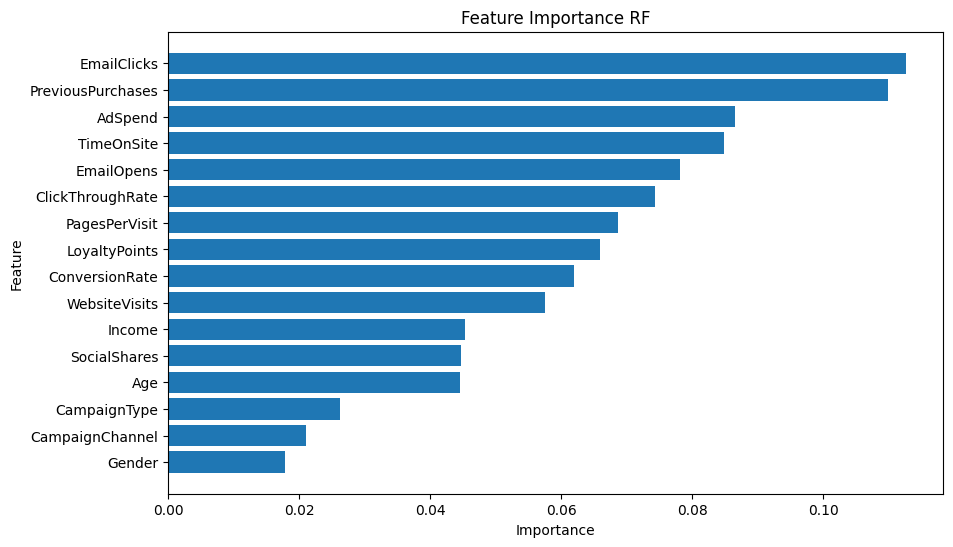

In [ ]:
# Vẽ biểu đồ
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance RF')
plt.gca().invert_yaxis()  # Đảo ngược để quan trọng nhất nằm trên cùng
plt.show()

### XGboot

In [ ]:
from xgboost import XGBClassifier
xgb_model=joblib.load('/content/drive/MyDrive/AI/Customer/model2/XGBoost_model.joblib')

In [ ]:
# Trích xuất độ quan trọng của đặc trưng xgb
importances_xgb = xgb_model.feature_importances_

In [ ]:
# Hiển thị đặc trưng quan trọng dưới dạng bảng
xgb_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

print(xgb_feature_importance_df)

              Feature  Importance
13        EmailClicks    0.164153
14  PreviousPurchases    0.141449
1              Gender    0.087443
4        CampaignType    0.061781
10         TimeOnSite    0.059533
12         EmailOpens    0.058746
5             AdSpend    0.051417
9       PagesPerVisit    0.050457
15      LoyaltyPoints    0.049865
7      ConversionRate    0.048375
8       WebsiteVisits    0.047946
6    ClickThroughRate    0.046286
11       SocialShares    0.036825
3     CampaignChannel    0.036204
2              Income    0.030545
0                 Age    0.028974


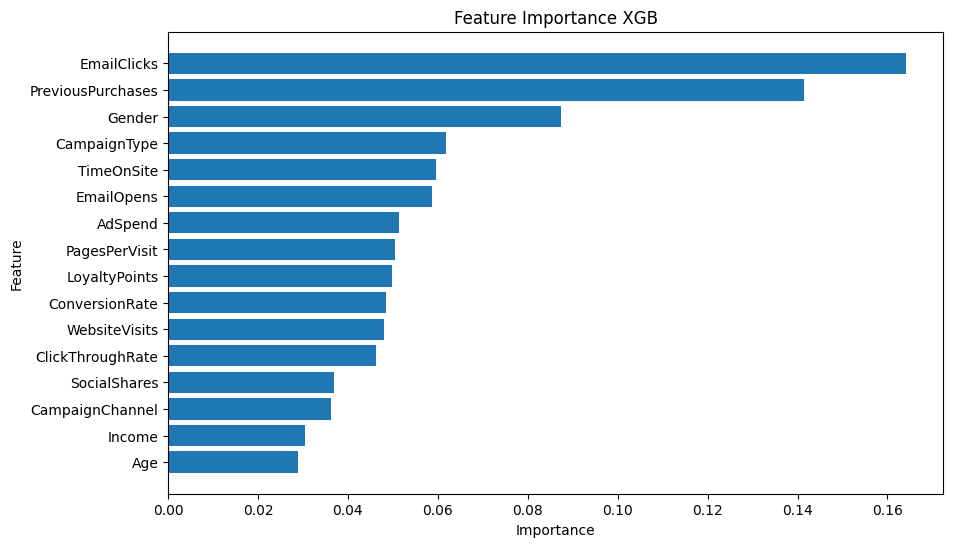

In [ ]:
# Vẽ biểu đồ
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance_df['Feature'], xgb_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance XGB')
plt.gca().invert_yaxis()  # Đảo ngược để quan trọng nhất nằm trên cùng
plt.show()

In [ ]:
# Callback để lưu trọng số tốt nhất
model_checkpoint = ModelCheckpoint(
    'best_NN-model.keras',          # Đường dẫn lưu model
    monitor='val_accuracy',   # Theo dõi val_accuracy
    save_best_only=True,      # Chỉ lưu model tốt nhất
    mode='max'                # Tối đa hóa val_accuracy
)

# Neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
NN_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
NN_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
NN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,497 (41.00 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = NN_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6779 - loss: 0.5892 - val_accuracy: 0.7533 - val_loss: 0.5056
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7571 - loss: 0.5112 - val_accuracy: 0.7636 - val_loss: 0.4951
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7656 - loss: 0.4974 - val_accuracy: 0.7722 - val_loss: 0.4807
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7759 - loss: 0.4813 - val_accuracy: 0.7736 - val_loss: 0.4762
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7808 - loss: 0.4717 - val_accuracy: 0.7836 - val_loss: 0.4707
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7854 - loss: 0.4600 - val_accuracy: 0.7843 - val_loss: 0.4578
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7963 - loss: 0.4478 - val_accuracy: 0.7897 - val_loss: 0.4501
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7967 - loss: 0.4387 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import classification_report
y_pred = NN_model.predict(X_test)
# Chuyển đổi y_pred thành dạng nhị phân
y_pred_classes = (y_pred > 0.5).astype("int32")

# Giả sử y_test là nhãn thực tế và y_pred_classes là nhãn dự đoán
print("neural network - Classification Report:\n")
report = classification_report(y_test, y_pred_classes) # Sử dụng y_pred_classes
print(report)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
neural network - Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1377
           1       0.91      0.84      0.87      1428

    accuracy                           0.88      2805
   macro avg       0.88      0.88      0.88      2805
weighted avg       0.88      0.88      0.88      2805



In [ ]:
from tensorflow.keras.models import load_model

# Load mô hình tốt nhất
best_NN_model = load_model('/content/drive/MyDrive/AI/Customer/best_NN-model.keras')

# Đánh giá trên tập kiểm tra
test_loss, test_accuracy = best_NN_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8201 - loss: 0.3901
Test Accuracy: 0.8157
Test Loss: 0.4081


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, classification_report
from sklearn.preprocessing import label_binarize

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


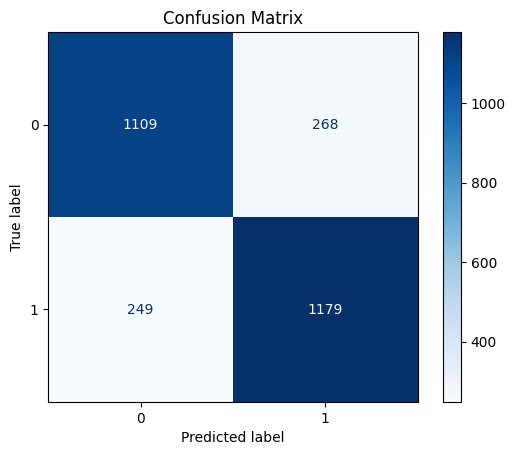

F1-Score: 0.82


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dự đoán nhãn
y_pred = best_NN_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Đối với mô hình nhị phân

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Vẽ confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Tính F1-score
f1 = f1_score(y_test, y_pred_classes)
print(f"F1-Score: {f1:.2f}")



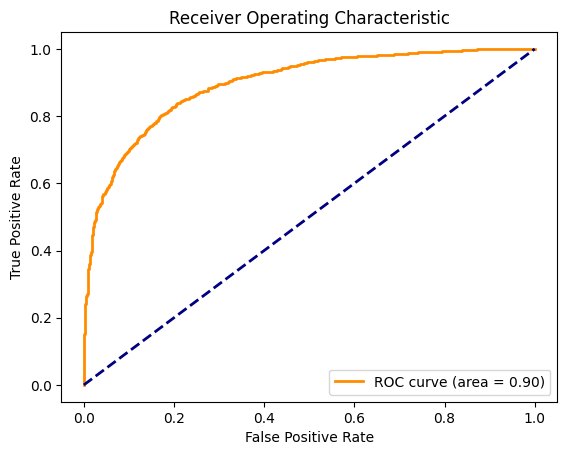

In [ ]:
# Tính TPR, FPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Vẽ ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Đường baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()